<a href="https://colab.research.google.com/github/EnidSinclair14/IBM-Capstone-Project-for-Data-Analytics-2025/blob/main/Store_Sales_Data_Analytics_IBM_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **STORE SALES DATA FORECASTING USING AI - PROPHET METHOD**

By Silvan Handrew Novarianto

**1. Data Transformation and Cleaning**

In [224]:
# Importing needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
# Make the background viz graphic white
sns.set(style="whitegrid")

In [226]:
# Read the Dataset
df = pd.read_csv('Different_stores_data_V2.csv')
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,total_profit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,375.100,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,540.153,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,5.020,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,500.425,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,60.600,Cash,South,Florida,Kanyon


In [227]:
# Checking Null Values
null_counts = df.isnull().sum()

print("Number of null values per column:")
display(null_counts)

Number of null values per column:


,0
invoice_no,0
invoice_date,0
customer_id,0
gender,0
age,0
category,0
quantity,0
selling_price_per_unit,0
total_profit,0
payment_method,0


In [228]:
# Separate the invoice_date column into 2 columns
df['invoiceDate'] = pd.to_datetime(df['invoice_date']).dt.date
df['invoiceTime'] = pd.to_datetime(df['invoice_date']).dt.time

if 'invoice_date' in df.columns:
    df = df.drop('invoice_date', axis=1)

cols = df.columns.tolist()

gender_index = cols.index('gender')

date_only_index = cols.index('invoiceDate')
time_index = cols.index('invoiceTime')

cols.pop(date_only_index)
cols.pop(time_index - 1)

cols.insert(gender_index, 'invoiceTime')
cols.insert(gender_index, 'invoiceDate')

df = df[cols]

display(df.head())

,invoice_no,customer_id,invoiceDate,invoiceTime,gender,age,category,quantity,selling_price_per_unit,total_profit,payment_method,region,state,shopping_mall
0,I138884,C241288,2016-10-30,09:58:00,Female,28,Clothing,5,1500.40,375.100,Credit Card,South,Kentucky,Kanyon
1,I317333,C111565,2016-10-30,09:58:00,Male,21,Shoes,3,1800.51,540.153,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,C266599,2016-10-30,09:58:00,Male,20,Clothing,1,300.08,5.020,Cash,West,California,Metrocity
3,I173702,C988172,2016-10-30,09:58:00,Female,66,Shoes,5,3000.85,500.425,Credit Card,South,Florida,Metropol AVM
4,I337046,C189076,2016-10-30,09:59:00,Female,53,Books,4,60.60,60.600,Cash,South,Florida,Kanyon


**2. Data Visualization to finds an Insight for Data Analytics**

/tmp/ipython-input-2265543113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='quantity', x='category', data=top_5_categories, palette='viridis')


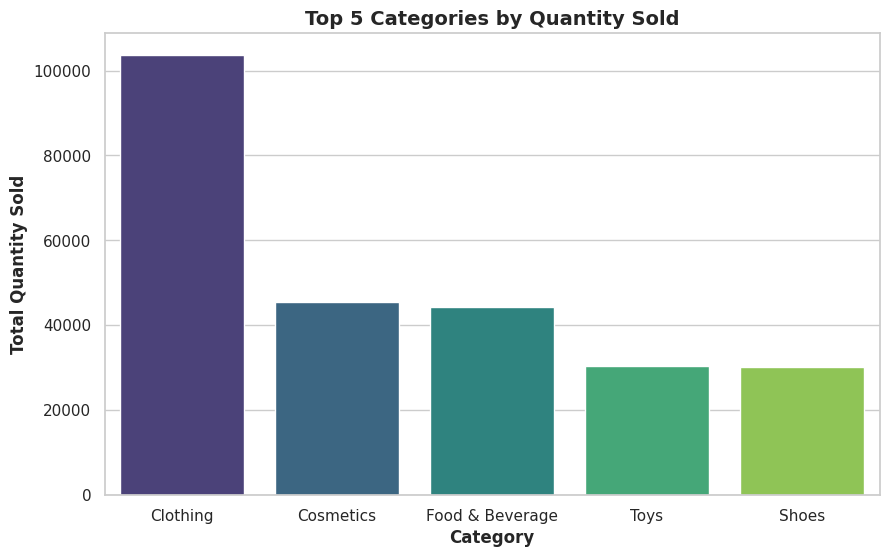


Top 10 Categories by Quantity Sold:


,category,quantity
0,Clothing,103598
1,Cosmetics,45501
2,Food & Beverage,44281
3,Toys,30321
4,Shoes,30217
5,Technology,15033
6,Books,14989
7,Souvenir,14871


In [229]:
category_sales = df.groupby('category')['quantity'].sum().reset_index()

top_5_categories = category_sales.sort_values(by='quantity', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(y='quantity', x='category', data=top_5_categories, palette='viridis')
plt.title('Top 5 Categories by Quantity Sold', fontsize=14, fontweight='bold')
plt.ylabel('Total Quantity Sold', fontsize=12, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.show()

print()

category_sales = df.groupby('category')['quantity'].sum().reset_index()

top_10_categories = category_sales.sort_values(by='quantity', ascending=False).head(10).reset_index(drop=True)

print("Top 10 Categories by Quantity Sold:")
display(top_10_categories)

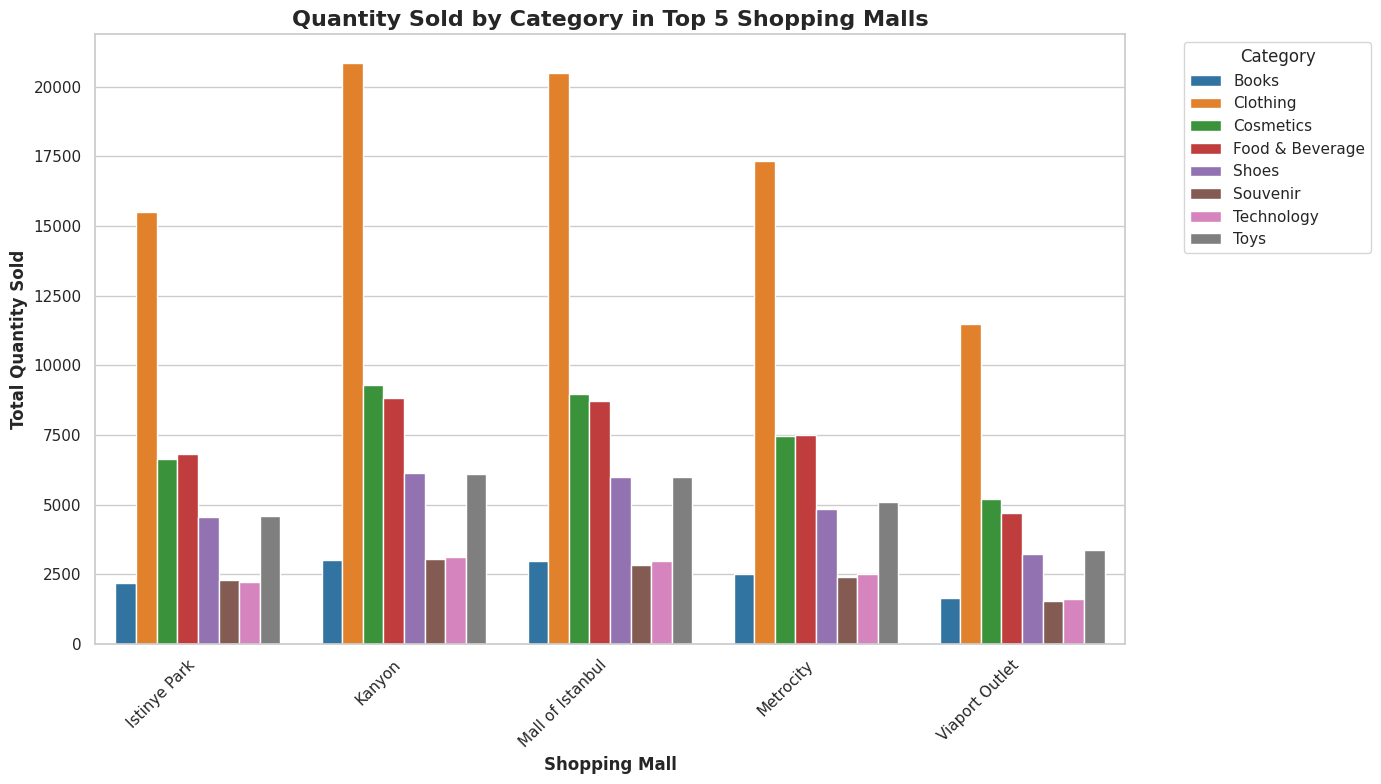


Top Selling Category in Each of the Top 5 Shopping Malls:


,shopping_mall,category,quantity
0,Istinye Park,Clothing,15503
1,Kanyon,Clothing,20832
2,Mall of Istanbul,Clothing,20485
3,Metrocity,Clothing,17317
4,Viaport Outlet,Clothing,11494


In [230]:
mall_category_sales = df.groupby(['shopping_mall', 'category'])['quantity'].sum().reset_index()

mall_total_sales = df.groupby('shopping_mall')['quantity'].sum().reset_index()
top_5_malls = mall_total_sales.sort_values(by='quantity', ascending=False).head(5)['shopping_mall'].tolist()

top_mall_category_sales = mall_category_sales[mall_category_sales['shopping_mall'].isin(top_5_malls)]

plt.figure(figsize=(14, 8))
sns.barplot(x='shopping_mall', y='quantity', hue='category', data=top_mall_category_sales, palette='tab10') # Mengganti palet warna
plt.title('Quantity Sold by Category in Top 5 Shopping Malls', fontsize=16, fontweight='bold')
plt.xlabel('Shopping Mall', fontsize=12, fontweight='bold')
plt.ylabel('Total Quantity Sold', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

top_category_per_mall = top_mall_category_sales.loc[top_mall_category_sales.groupby('shopping_mall')['quantity'].idxmax()].reset_index(drop=True)

print("\nTop Selling Category in Each of the Top 5 Shopping Malls:")
display(top_category_per_mall)

/tmp/ipython-input-1431007471.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_categories_per_gender = gender_category_sales.groupby('gender').apply(lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)


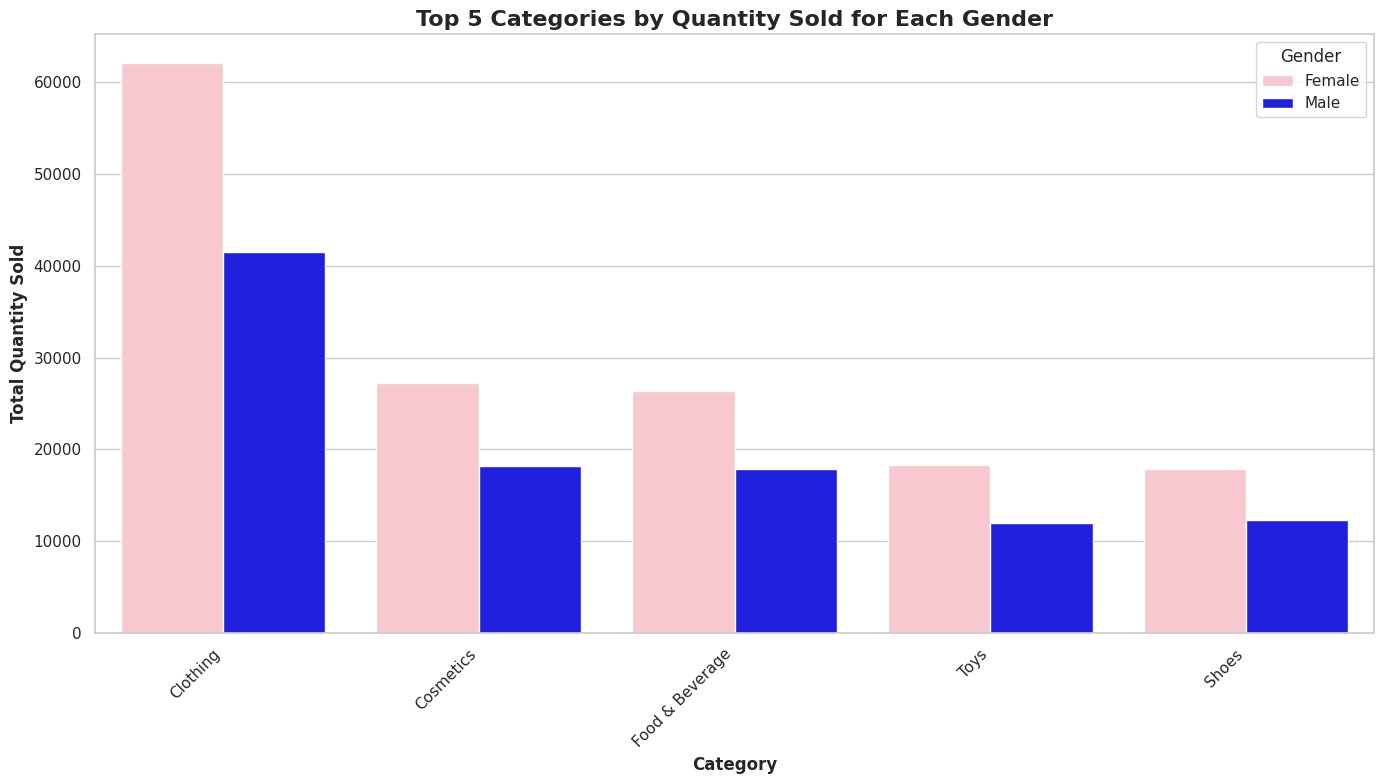


Top 5 Categories by Quantity Sold for Female:


,gender,category,quantity
0,Female,Clothing,62062
1,Female,Cosmetics,27277
2,Female,Food & Beverage,26362
3,Female,Toys,18362
4,Female,Shoes,17906



Top 5 Categories by Quantity Sold for Male:


,gender,category,quantity
0,Male,Clothing,41536
1,Male,Cosmetics,18224
2,Male,Food & Beverage,17919
3,Male,Shoes,12311
4,Male,Toys,11959


In [231]:
gender_category_sales = df.groupby(['gender', 'category'])['quantity'].sum().reset_index()

top_5_categories_per_gender = gender_category_sales.groupby('gender').apply(lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='category', y='quantity', hue='gender', data=top_5_categories_per_gender, palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Top 5 Categories by Quantity Sold for Each Gender', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Total Quantity Sold', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

print()

female_top_5_categories = top_5_categories_per_gender[top_5_categories_per_gender['gender'] == 'Female'].reset_index(drop=True)

male_top_5_categories = top_5_categories_per_gender[top_5_categories_per_gender['gender'] == 'Male'].reset_index(drop=True)

print("Top 5 Categories by Quantity Sold for Female:")
display(female_top_5_categories)

print("\nTop 5 Categories by Quantity Sold for Male:")
display(male_top_5_categories)

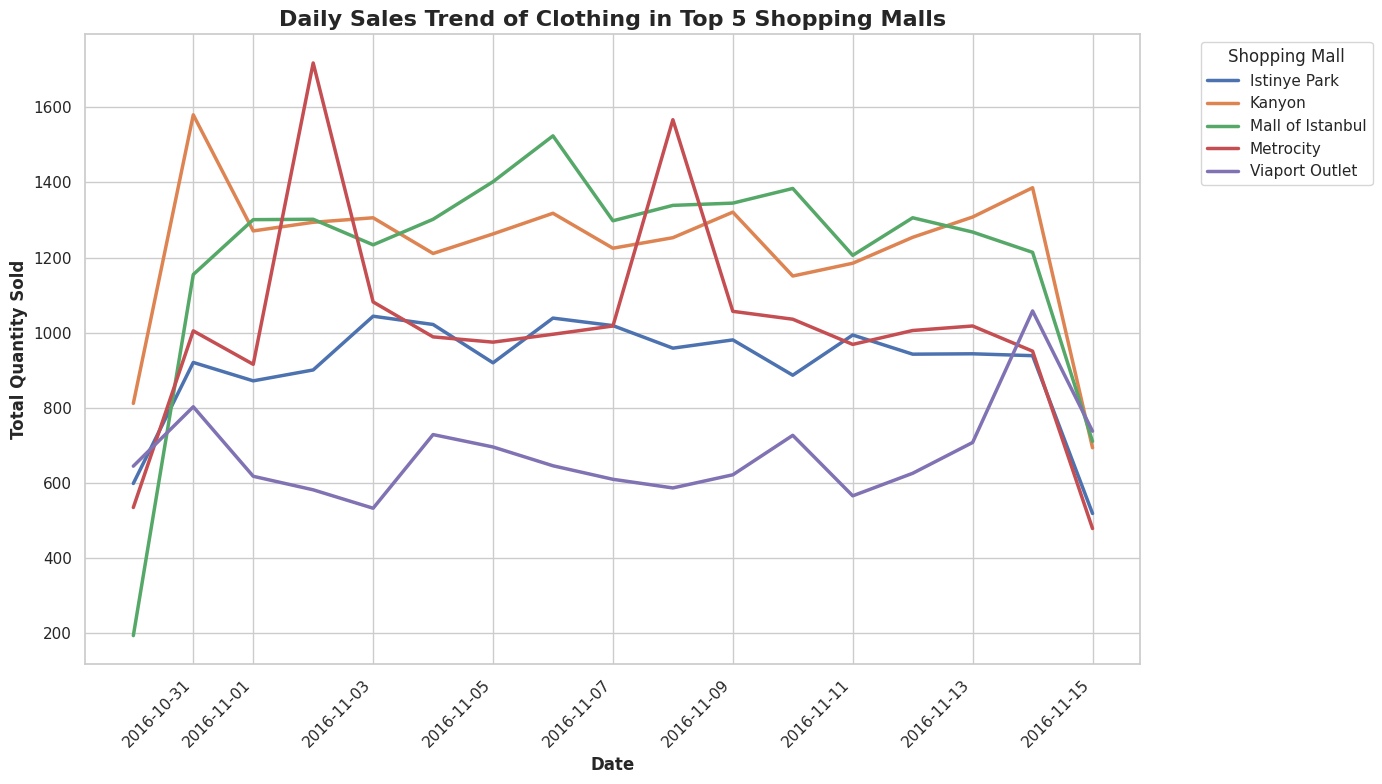

In [232]:
clothing_sales = df[df['category'] == 'Clothing'].copy()

clothing_sales['invoiceDate'] = pd.to_datetime(clothing_sales['invoiceDate'])

daily_clothing_sales = clothing_sales.groupby(['invoiceDate', 'shopping_mall'])['quantity'].sum().reset_index()

daily_clothing_sales_top_5_malls = daily_clothing_sales[daily_clothing_sales['shopping_mall'].isin(top_5_malls)]

plt.figure(figsize=(14, 8))
sns.lineplot(x='invoiceDate', y='quantity', hue='shopping_mall', data=daily_clothing_sales_top_5_malls, linewidth=2.5) # Added linewidth
plt.title('Daily Sales Trend of Clothing in Top 5 Shopping Malls', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Quantity Sold', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Shopping Mall', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

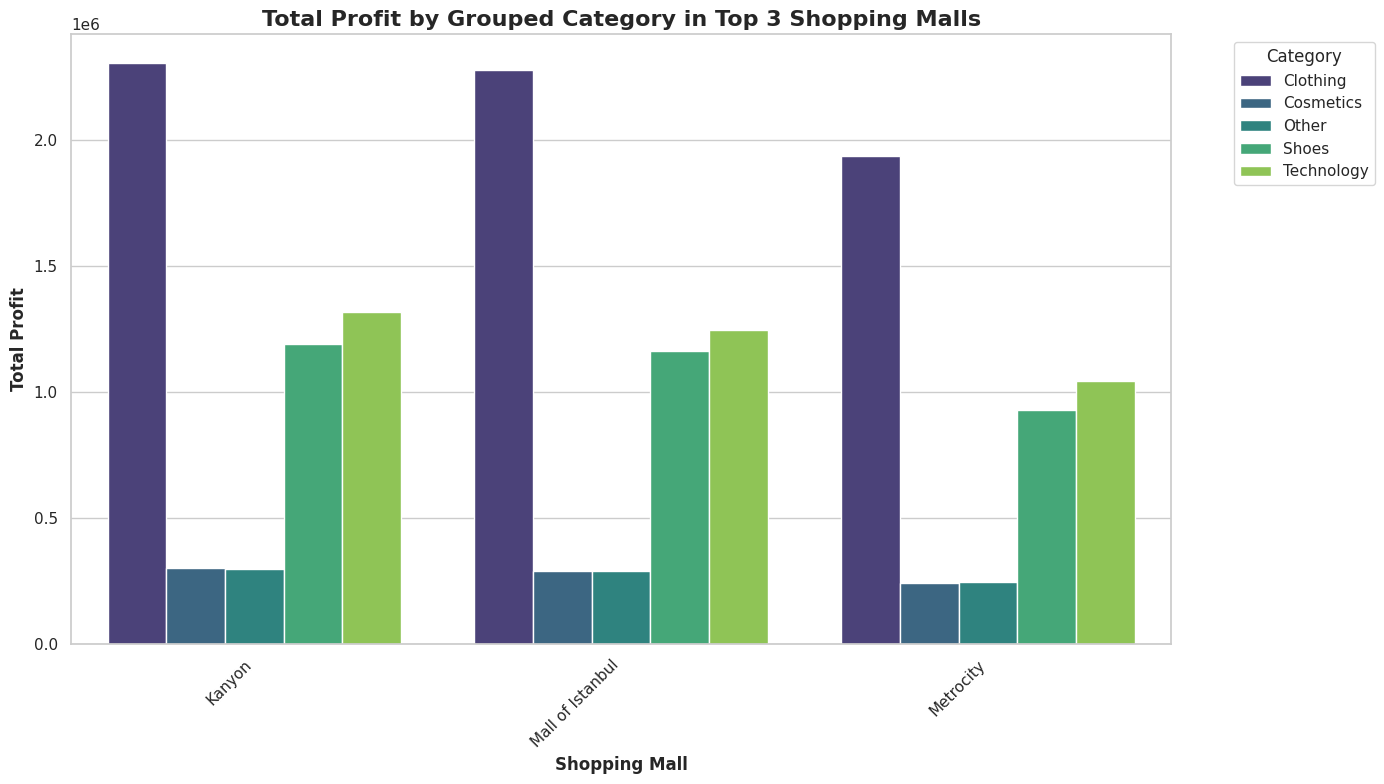


Total Profit by Grouped Category for Kanyon:


,grouped_category,total_profit_formatted
0,Clothing,"2,303,943"
1,Cosmetics,"301,468"
2,Other,"296,446"
3,Shoes,"1,191,938"
4,Technology,"1,316,070"



Total Profit by Grouped Category for Mall of Istanbul:


,grouped_category,total_profit_formatted
0,Clothing,"2,276,932"
1,Cosmetics,"289,617"
2,Other,"291,145"
3,Shoes,"1,164,960"
4,Technology,"1,246,402"



Total Profit by Grouped Category for Metrocity:


,grouped_category,total_profit_formatted
0,Clothing,"1,937,502"
1,Cosmetics,"241,443"
2,Other,"247,651"
3,Shoes,"928,823"
4,Technology,"1,042,650"


In [233]:
mall_category_profit = df.groupby(['shopping_mall', 'category'])['total_profit'].sum().reset_index()

overall_top_categories = mall_category_profit.groupby('category')['total_profit'].sum().nlargest(4).index.tolist()

def categorize_sales(row):
    if row['category'] in overall_top_categories:
        return row['category']
    else:
        return 'Other'

mall_category_profit['grouped_category'] = mall_category_profit.apply(categorize_sales, axis=1)

grouped_mall_category_profit = mall_category_profit.groupby(['shopping_mall', 'grouped_category'])['total_profit'].sum().reset_index()

top_3_malls_profit = df.groupby('shopping_mall')['total_profit'].sum().nlargest(3).index.tolist()

top_malls_grouped_profit = grouped_mall_category_profit[grouped_mall_category_profit['shopping_mall'].isin(top_3_malls_profit)].copy()

plt.figure(figsize=(14, 8))
sns.barplot(x='shopping_mall', y='total_profit', hue='grouped_category', data=top_malls_grouped_profit, palette='viridis')

plt.title('Total Profit by Grouped Category in Top 3 Shopping Malls', fontsize=16, fontweight='bold')
plt.xlabel('Shopping Mall', fontsize=12, fontweight='bold')
plt.ylabel('Total Profit', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

top_malls_grouped_profit['total_profit_formatted'] = top_malls_grouped_profit['total_profit'].apply(lambda x: f'{x:,.0f}')

for mall in top_3_malls_profit:
    print(f"\nTotal Profit by Grouped Category for {mall}:")
    display(top_malls_grouped_profit[top_malls_grouped_profit['shopping_mall'] == mall][['grouped_category', 'total_profit_formatted']].reset_index(drop=True))

**3. Data Analytics using AI Method "Time Series Forecasting"**

Analyze sales trends and forecast sales for the next month using AI Time Series Forecasting based on the data

In [234]:
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])

daily_sales = df.groupby('invoiceDate')['quantity'].sum().reset_index()

weekly_sales = daily_sales.resample('W-Mon', on='invoiceDate')['quantity'].sum().reset_index()

print("Daily Sales:")
display(daily_sales.head())

print("\nWeekly Sales:")
display(weekly_sales.head())

Daily Sales:


,invoiceDate,quantity
0,2016-10-30,10977
1,2016-10-31,18592
2,2016-11-01,18413
3,2016-11-02,18439
4,2016-11-03,18584



Weekly Sales:


,invoiceDate,quantity
0,2016-10-31,29569
1,2016-11-07,129742
2,2016-11-14,129659
3,2016-11-21,9841


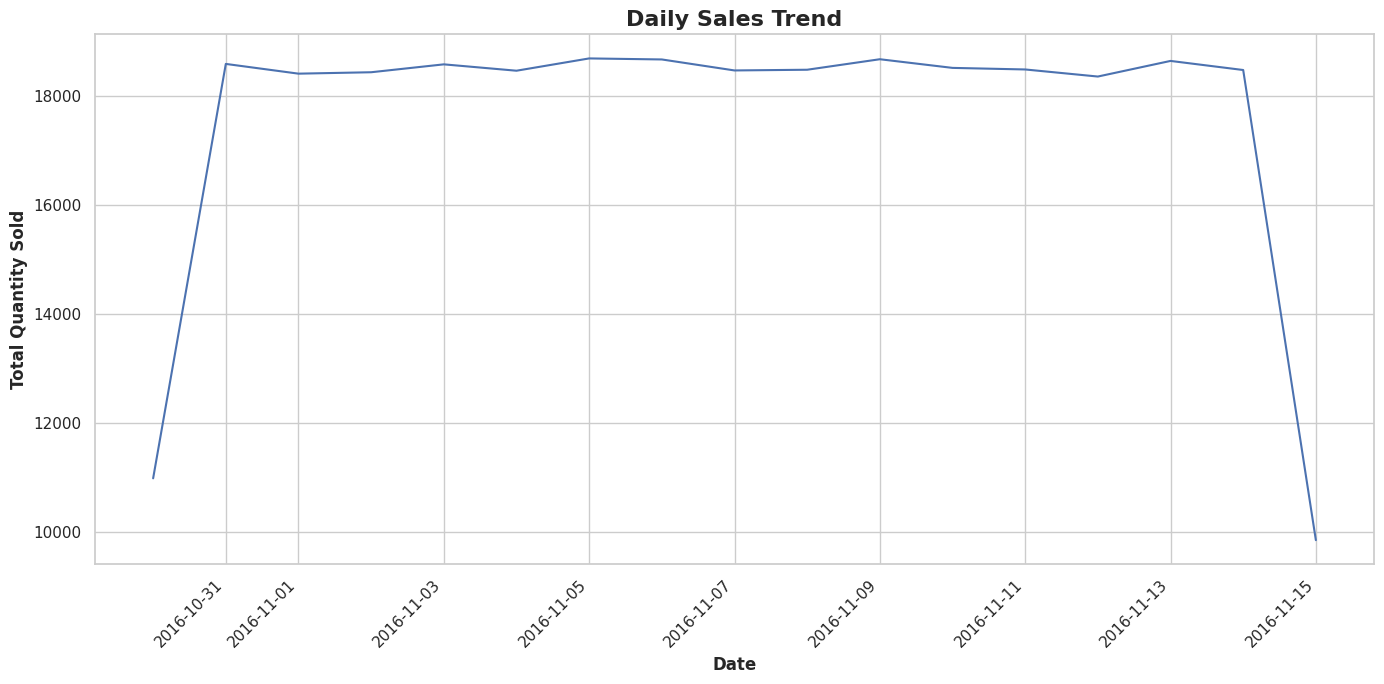

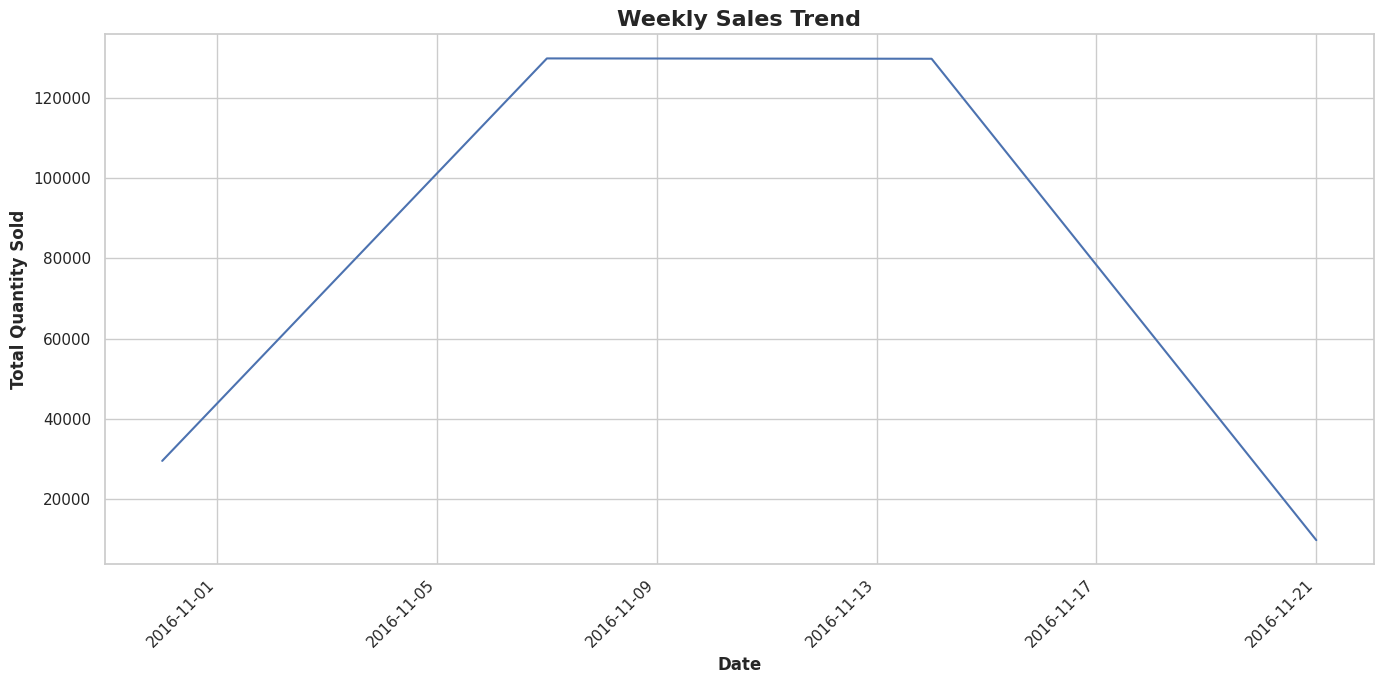

In [235]:
# Visualize daily sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='invoiceDate', y='quantity', data=daily_sales)
plt.title('Daily Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Quantity Sold', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize weekly sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='invoiceDate', y='quantity', data=weekly_sales)
plt.title('Weekly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Quantity Sold', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the visualizations, the data shows a short time frame with a clear trend and potential daily patterns. Given the limited data and the goal of forecasting one month, a simple model like ARIMA might be sufficient. However, considering the potential for recurring patterns within the week (daily seasonality), SARIMA could be a better choice. Prophet is also a strong candidate for handling seasonality, even with limited data. I will choose Prophet as it is generally robust and handles seasonality well, even complex patterns.



# **PROPHET**

**Explain the reasoning behind choosing Prophet**

Based on the visualizations of daily and weekly sales trends:

- The data covers a relatively short period.
- There appears to be a general trend in the data.
- There are likely daily or weekly seasonal patterns, although the short duration makes strong conclusions about longer seasonality difficult.

Given these characteristics and the goal of forecasting sales for the next month, the Prophet model is a suitable choice because:

- It is designed to handle time series data with strong seasonal effects and trends.
- It is relatively robust to missing data and outliers.
- It is well-suited for forecasting with a relatively short history, as it doesn't require a long time series to detect basic seasonality.
- It can incorporate holidays and other external regressors if needed (though not explored in this basic analysis).

While ARIMA and SARIMA are also possibilities, Prophet's ease of use and ability to model seasonality make it a practical choice for this forecasting task.

## Model training

### Subtask:
Train the selected model (Prophet) on the historical sales data.


**Reasoning**:
Import the Prophet library and prepare the data for training by renaming columns and fitting the model.



In [236]:
from prophet import Prophet

prophet_data = daily_sales.rename(columns={'invoiceDate': 'ds', 'quantity': 'y'})

model = Prophet(yearly_seasonality=False, weekly_seasonality=True)

model.fit(prophet_data)

print("Prophet model trained successfully.")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsazxer9o/66ef790a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsazxer9o/7nc0cdcc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78066', 'data', 'file=/tmp/tmpsazxer9o/66ef790a.json', 'init=/tmp/tmpsazxer9o/7nc0cdcc.json', 'output', 'file=/tmp/tmpsazxer9o/prophet_modelyag440y8/prophet_model-20250816224620.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:46:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:46:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet model trained successfully.


## Forecasting

### Subtask:
Use the trained Prophet model to forecast sales for the next month.


**Reasoning**:
Create future dates for forecasting and generate the forecast using the trained Prophet model.



In [237]:
# Create a DataFrame of future dates for the next month (30 days)
future_dates = model.make_future_dataframe(periods=30, freq='D')

# Generate the forecast
forecast = model.predict(future_dates)

# Display the first few rows of the forecast DataFrame
print("Sales Forecast for the next month:")
display(forecast.head())

Sales Forecast for the next month:


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-10-30,17916.642324,13235.515223,19262.490068,17916.642324,17916.642324,-1678.855064,-1678.855064,-1678.855064,-1678.855064,-1678.855064,-1678.855064,0.0,0.0,0.0,16237.787260
1,2016-10-31,17896.021842,15740.299639,21659.007090,17896.021842,17896.021842,756.018670,756.018670,756.018670,756.018670,756.018670,756.018670,0.0,0.0,0.0,18652.040512
2,2016-11-01,17875.401360,12686.154199,18434.572313,17875.401360,17875.401360,-2158.847902,-2158.847902,-2158.847902,-2158.847902,-2158.847902,-2158.847902,0.0,0.0,0.0,15716.553458
3,2016-11-02,17854.780877,15737.017969,21434.296683,17854.780877,17854.780877,771.576497,771.576497,771.576497,771.576497,771.576497,771.576497,0.0,0.0,0.0,18626.357375
4,2016-11-03,17834.160394,15583.408644,21254.047373,17834.160394,17834.160394,783.632992,783.632992,783.632992,783.632992,783.632992,783.632992,0.0,0.0,0.0,18617.793386


## Visualize forecast

### Subtask:
Plot the historical data and the forecast to visualize the trend and predictions.


**Reasoning**:
Visualize the historical data, forecast, and forecast components using the Prophet model's built-in plotting functions.



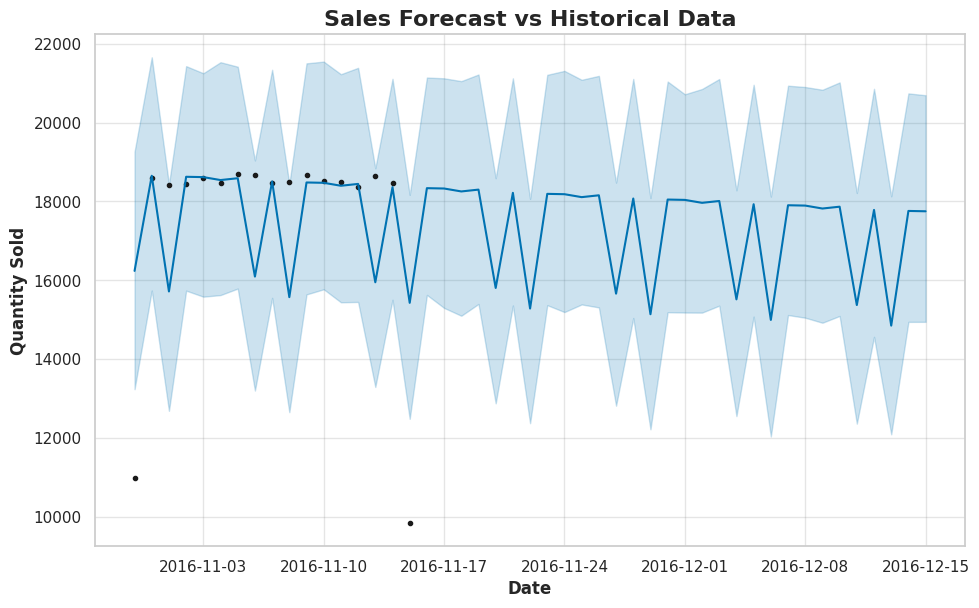

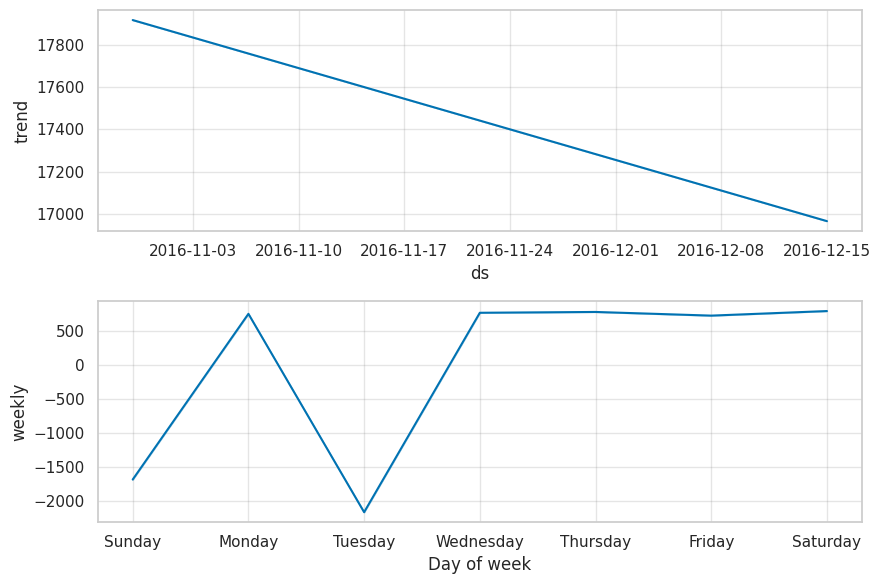

In [238]:
# Plot the historical data and the forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast vs Historical Data', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Quantity Sold', fontsize=12, fontweight='bold')
plt.show()

# Plot the forecast components (trend and weekly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

## Evaluate model

### Subtask:
Evaluate the model's performance on this test set.


**Reasoning**:
Evaluate the model's performance by calculating relevant metrics using the historical data as the test set. Prophet's `predict` method on the historical data can be used for this evaluation.



In [239]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use the historical data for evaluation (since we didn't explicitly create a test set)
# Prophet's predict method on the original dates provides the in-sample fit,
# which we'll use here for evaluation as a proxy for a test set performance.
historical_forecast = model.predict(prophet_data[['ds']])

# Merge the actual values with the historical forecast
evaluation_df = prophet_data.merge(historical_forecast[['ds', 'yhat']], on='ds')

# Calculate evaluation metrics
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Model Evaluation Metrics (on historical data):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Evaluation Metrics (on historical data):
Mean Absolute Error (MAE): 1339.22
Mean Squared Error (MSE): 5218145.28
Root Mean Squared Error (RMSE): 2284.33


## Summary:

### Data Analysis Key Findings

*   Daily sales data was aggregated by summing the quantity sold per day.
*   Weekly sales data was aggregated by resampling the daily data to a weekly frequency (starting Monday).
*   Visualization of the daily and weekly sales trends revealed a clear trend and likely daily or weekly seasonal patterns within the relatively short data period.
*   The Prophet model was successfully trained on the daily sales data (renamed to 'ds' for date and 'y' for quantity).
*   Prophet model parameters were set to exclude yearly seasonality but include weekly seasonality.
*   The model generated a sales forecast for the next 30 days.
*   Evaluation metrics on the historical data showed a Mean Absolute Error (MAE) of 1339.22, Mean Squared Error (MSE) of 5218145.28, and Root Mean Squared Error (RMSE) of 2284.33. These metrics represent the model's in-sample fit error.

### Insights or Next Steps

*   The current evaluation metrics are based on the historical data itself. For a more robust evaluation, split the historical data into training and testing sets to assess the model's out-of-sample performance.
*   Investigate potential external factors or holidays that might influence sales and incorporate them into the Prophet model as additional regressors to potentially improve forecast accuracy.
